In [80]:
# Base
import os
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from collections import Counter

# Wordcloud
from PIL import Image
from wordcloud import WordCloud

# NLP Summarizer
from sumy.parsers.plaintext import PlaintextParser
from sumy.summarizers.lsa import LsaSummarizer
from sumy.nlp.tokenizers import Tokenizer
from sumy.nlp.stemmers import Stemmer
from sumy.utils import get_stop_words

# NLP Sentiment analysis
from nltk import FreqDist
from nltk.sentiment import SentimentIntensityAnalyzer

## Textual Data Exploration

#### Van Halen 1984 album (Only the songs which have lyrics)

In [4]:
album_folder = './Data/1984 album Van Halen' 
songs = os.listdir(album_folder)
songs

['Drop Dead Legs.txt',
 'Girl Gone Bad.txt',
 'Hot for Teacher.txt',
 'House of Pain.txt',
 "I'll Wait.txt",
 'Jump.txt',
 'Panama.txt',
 'Top Jimmy.txt']

In [5]:
# Corpus of lyrics (Corpus: A collection of textual data)
album_corpus = []

for lyrics in songs:
    with open(album_folder + '/' + lyrics, encoding='utf8') as f_input:
        album_corpus.append(f_input.read())

In [10]:
len(album_corpus)

8

In [12]:
# Getting all the words in the album song lyrics
album_word_list = []

for lyrics in album_corpus:
    for word in lyrics.split():
        album_word_list.append(word)

In [15]:
# album_word_list

In [16]:
len(album_word_list)

1398

In [46]:
# Counting unique words in the lyrics
album_unique_words = Counter(album_word_list)
len(album_unique_words) 

493

In [48]:
# album_unique_words

#### George Orwell 1984 novel

In [19]:
novel = './Data/1984-novel-George Orwell.txt'

In [21]:
# Novel corpus
novel_corpus = []
with open(novel, encoding='utf8') as f_input:
    novel_corpus.append(f_input.read())

In [26]:
# novel_corpus

In [59]:
novel_words_list = novel_corpus[0].split()

In [29]:
# novel_word_list

In [60]:
len(novel_words_list)

103377

In [61]:
# Counting unique words in the novel
novel_unique_words = Counter(novel_words_list)
len(novel_unique_words) 

15530

In [51]:
# novel_unique_words

### Word clouds

In [100]:
# Getting stop words
stop_words = list(get_stop_words(language='english'))

In [57]:
# Getting words not present in default stop words list
clean_album_words_list = []

for word in album_word_list:
    if word not in stop_words:
        clean_album_words_list.append(word)

In [56]:
# clean_album_words_list

In [58]:
len(clean_album_words_list)

829

In [65]:
# Frequency of clean words in album
frequency_of_clean_album_words = FreqDist(clean_album_words_list)

In [66]:
# These words can be added to the stop word list
frequency_of_clean_album_words

FreqDist({'I': 37, '[Chorus]': 17, 'bad,': 16, 'bad': 15, "I'm": 15, 'hot': 13, '[Verse': 12, 'teacher': 12, 'jump': 12, 'Panama': 10, ...})

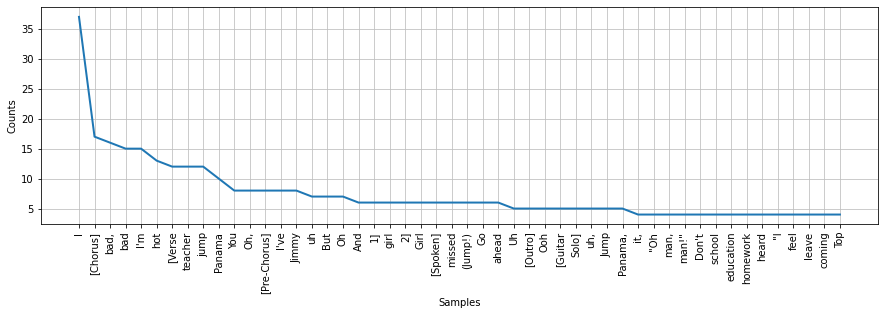

<AxesSubplot:xlabel='Samples', ylabel='Counts'>

In [87]:
plt.figure(figsize=(15, 4))
frequency_of_clean_album_words.plot(50, cumulative=False)

In [75]:
count_clean_album_words_list = Counter(clean_album_words_list)

In [82]:
# count_clean_album_words_list

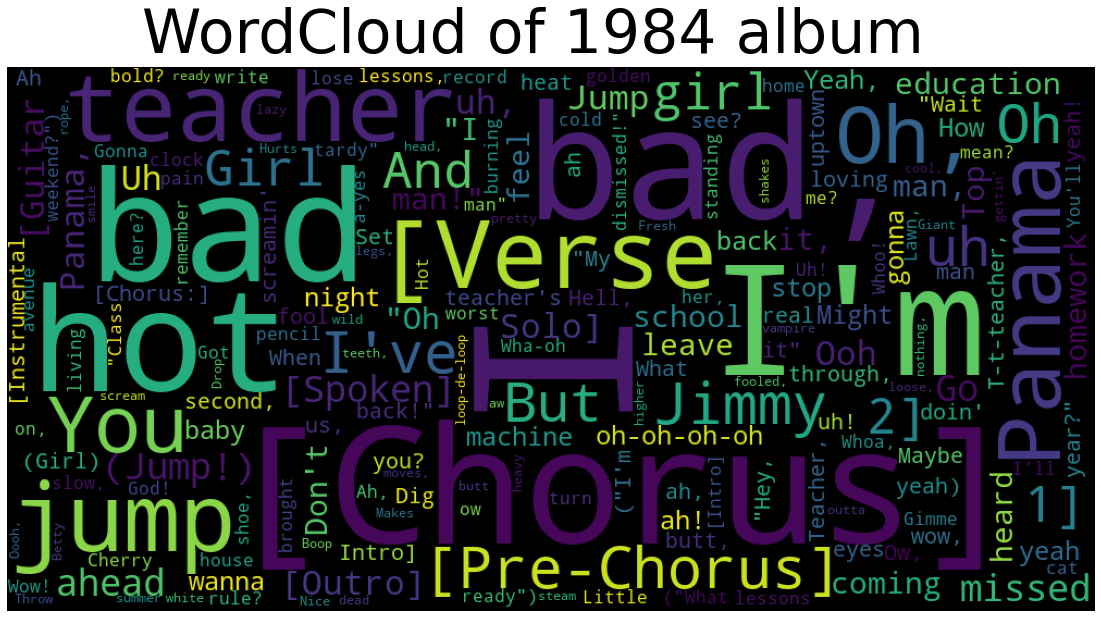

In [88]:
wordcloud_1984_album = WordCloud(width=1000, height=500).generate_from_frequencies(count_clean_album_words_list)

plt.figure(figsize=(20, 10))
plt.figtext(.5, .9, 'WordCloud of 1984 album', fontsize=60, ha='center')
plt.imshow(wordcloud_1984_album)
plt.axis('off')
plt.show()

In [90]:
clean_novel_words_list = []

for word in novel_words_list:
    if word not in stop_words:
        clean_novel_words_list.append(word)

In [92]:
# clean_novel_words_list

In [93]:
frequency_of_clean_novel_words = FreqDist(clean_novel_words_list)

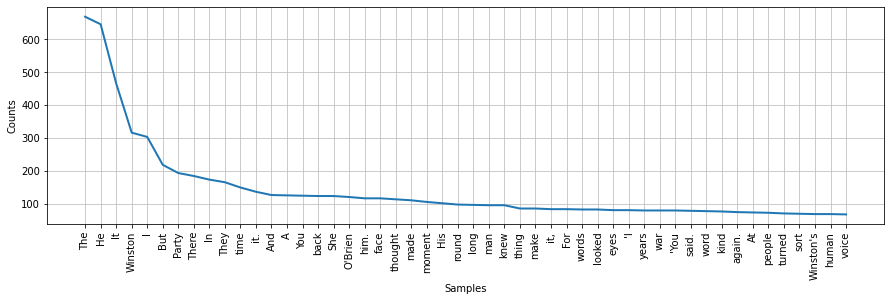

<AxesSubplot:xlabel='Samples', ylabel='Counts'>

In [96]:
plt.figure(figsize=(15, 4))
frequency_of_clean_novel_words.plot(50, cumulative=False)

In [97]:
count_clean_novel_words_list = Counter(clean_novel_words_list)

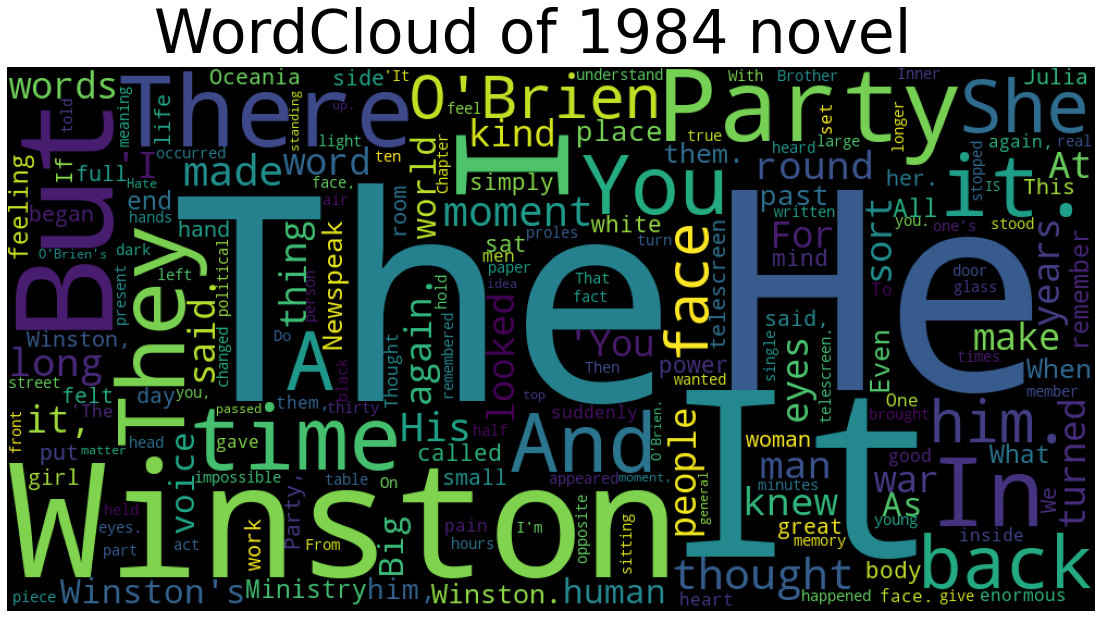

In [98]:
wordcloud_1984_novel = WordCloud(width=1000, height=500).generate_from_frequencies(count_clean_novel_words_list)

plt.figure(figsize=(20, 10))
plt.figtext(.5, .9, 'WordCloud of 1984 novel', fontsize=60, ha='center')
plt.imshow(wordcloud_1984_novel)
plt.axis('off')
plt.show()

### NLP Summarization

In [104]:
# Downloading reqired tokenizer from nltk package
import nltk
nltk.download('punkt')

[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\shaur\AppData\Roaming\nltk_data...
[nltk_data]   Unzipping tokenizers\punkt.zip.


True

In [106]:
# LSA: Latent Semantic Analysis
# For extracting and representing meanings behind words
lsa = LsaSummarizer(Stemmer('english'))
lsa.stop_words = get_stop_words('english')
parser = PlaintextParser.from_string(' '.join(album_corpus), Tokenizer('english'))
lsa_summary = lsa(parser.document, 10)
lsa_summary_list = [str(sentence) for sentence in lsa_summary]
# Calling LSA on parts of the document with content, it just creates sentences for each of
# the single lyrics 

summary_album = ' '.join(lsa_summary_list)
print('Summary of 1984 album')
print(summary_album)

Summary of 1984 album
Drop dead legs, pretty smile Hurts my head, gets me wild Dig that steam Giant butt Makes me scream I get nothing, nothing but the shakes over you And nothing else could ever do Dig those moves, vampire Set me loose, get it higher Throw my rope, loop-de-loop Nice white teeth, Betty Boop Set it cool, real heavy I ain't fooled, gettin' ready Oooh, aw baby [Verse 1] Ah lazy eyes in the summer heat Fresh from outta town Now she's working on the street Shakin' poor boys down [Verse 2] Found that girl with a lonesome John But she should've been with me Guess that woman fallen in love She don't work for free [Verse 1] Say you're gonna leave me 'Cause I only tie you up I always loved you tender But you only like it rough Woman bound for glory Why you're leavin' me again? Here she comes, full blast and top down Hot shoe, burning down the avenue Model citizen, zero discipline [Verse 2] Ain't nothin' like it, her shiny machine Got the feel for the wheel, keep the moving parts

In [107]:
lsa = LsaSummarizer(Stemmer('english'))
lsa.stop_words = get_stop_words('english')
parser = PlaintextParser.from_string(' '.join(novel_corpus), Tokenizer('english'))
lsa_summary = lsa(parser.document, 20)
lsa_summary_list = [str(sentence) for sentence in lsa_summary]
# Calling LSA on parts of the document with content, it just creates sentences for each of
# the single lyrics 

summary_novel = ' '.join(lsa_summary_list)
print('Summary of 1984 novel')
print(summary_novel)

c:\Users\shaur\anaconda3\envs\tf-gpu\lib\site-packages\sumy\summarizers\lsa.py:76: UserWarning: Number of words (5813) is lower than number of sentences (6827). LSA algorithm may not work properly.
  warn(message % (words_count, sentences_count))


Summary of 1984 novel
When one knew that any document was due for destruction, or even when one saw a scrap of waste paper lying about, it was an automatic action to lift the flap of the nearest memory hole and drop it in, whereupon it would be whirled away on a current of warm air to the enormous furnaces which were hidden somewhere in the recesses of the building. And a few cubicles away a mild, ineffectual, dreamy creature named Ampleforth, with very hairy ears and a surprising talent for juggling with rhymes and metres, was engaged in producing garbled versions--definitive texts, they were called--of poems which had become ideologically offensive, but which for one reason or another were to be retained in the anthologies. And the Records Department, after all, was itself only a single branch of the Ministry of Truth, whose primary job was not to reconstruct the past but to supply the citizens of Oceania with newspapers, films, textbooks, telescreen programmes, plays, novels--with e

### NLP Sentiment Analysis

In [108]:
nltk.download('vader_lexicon')

[nltk_data] Downloading package vader_lexicon to
[nltk_data]     C:\Users\shaur\AppData\Roaming\nltk_data...


True

In [109]:
sentiment_analyzer = SentimentIntensityAnalyzer()

In [110]:
print('Sentiment analysis of 1984 album')
print(sentiment_analyzer.polarity_scores(' '.join(album_corpus)))

Sentiment analysis of 1984 album
{'neg': 0.155, 'neu': 0.713, 'pos': 0.133, 'compound': -0.9953}


In [111]:
print('Sentiment analysis of 1984 novel')
print(sentiment_analyzer.polarity_scores(' '.join(novel_corpus)))

Sentiment analysis of 1984 novel
{'neg': 0.106, 'neu': 0.798, 'pos': 0.096, 'compound': -1.0}
